<a href="https://colab.research.google.com/github/MrChristianMoreno/UDEMY/blob/main/UdemyMachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import tree

In [3]:
#vincular disco
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#leer archivo csv '/content/drive/MyDrive/Colab Notebooks/DataSet_Titanic.csv'
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DataSet_Titanic.csv')

In [5]:
#visualizar las primeras 5 filas
df.head()

,Sobreviviente,Clase,Genero,Edad,HermEsp,PadHij
0,0,3,0,22.0,1,0
1,1,1,1,38.0,1,0
2,1,3,1,26.0,0,0
3,1,1,1,35.0,1,0
4,0,3,0,35.0,0,0


In [6]:
# guardar en variable x los atributos predictores (todas las cametiquetas except "Sobreviviente")
X = df.drop("Sobreviviente", axis=1)

#guardar en y la etiqueta a predecir ("Sobreviviente")
y = df.Sobreviviente

In [7]:
#visualizar X
X.head()

,Clase,Genero,Edad,HermEsp,PadHij
0,3,0,22.0,1,0
1,1,1,38.0,1,0
2,3,1,26.0,0,0
3,1,1,35.0,1,0
4,3,0,35.0,0,0


In [8]:
#visualizar Y
y.head()

,Sobreviviente
0,0
1,1
2,1
3,1
4,0


In [18]:
#creamos un objeto arbol
arbol = DecisionTreeClassifier(max_depth=3, random_state=42)

In [19]:
#entrenamos a la maquina
arbol.fit(X, y)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [20]:
#predecimos sobre nuestro set
pred_y = arbol.predict(X)

#comparamos con las etiquetas reales
print("precicion: ", accuracy_score(y, pred_y))

precicion:  0.8151260504201681


In [21]:
#creamos una matriz de confusion
confusion_matrix(y, pred_y)

array([[372,  52],
       [ 80, 210]])

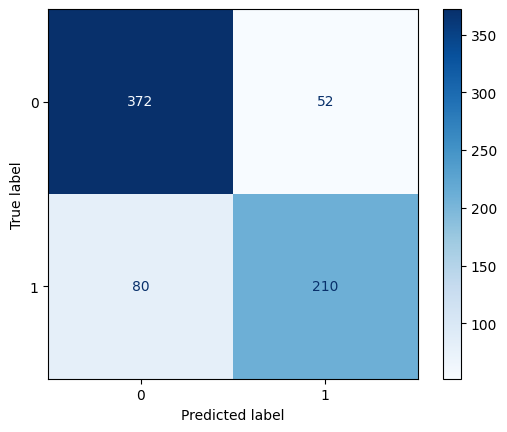

In [22]:
#creamos un grafico para la matriz de confusion
ConfusionMatrixDisplay.from_estimator(arbol, X, y, cmap=plt.cm.Blues, values_format='.0f')


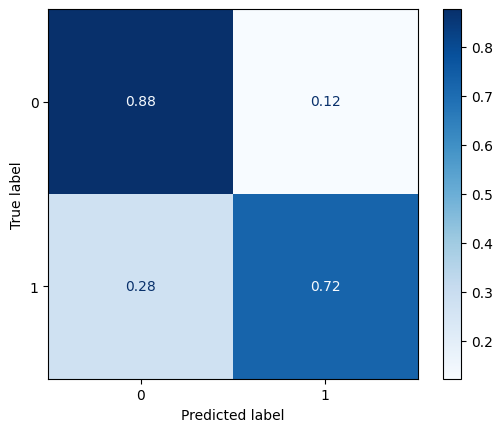

In [23]:
#creamos un grafico para la matriz de confusion normalizada
ConfusionMatrixDisplay.from_estimator(arbol, X, y, cmap=plt.cm.Blues, normalize='true', values_format='.2f')

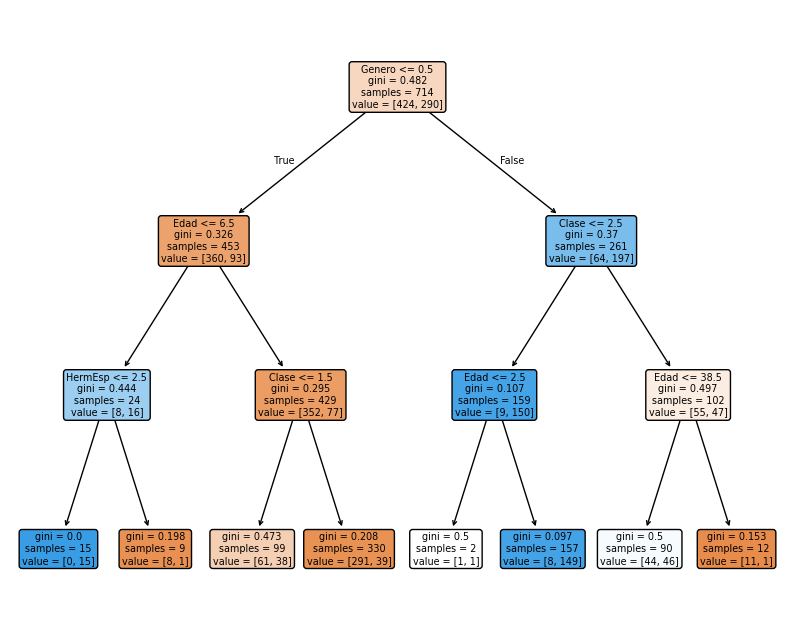

In [24]:
# mostramos un arbol graficamente
plt.figure(figsize=(10, 8))
tree.plot_tree(arbol, feature_names=X.columns, filled=True, rounded=True)
plt.show()

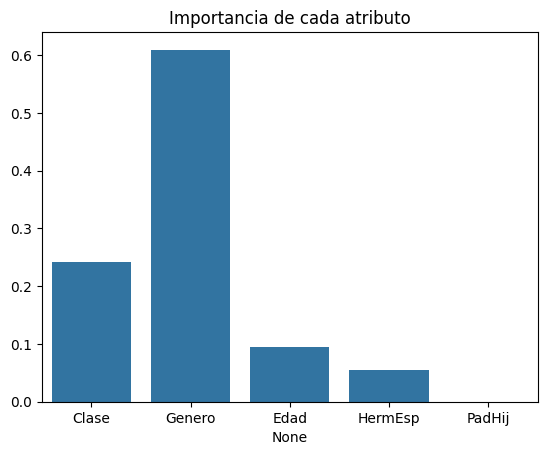

In [27]:
#graficamos las importancias en un grafico de barras
#creamos las variables x (importancias) e y (columnas)
importancias = arbol.feature_importances_
columnas = X.columns

#creamos el grafico
sns.barplot(x=columnas, y=importancias)
plt.title("Importancia de cada atributo")
plt.show()
